Reproducing the results in Hrants [paper](http://pubs.acs.org/doi/full/10.1021/ct300407g) for the variance in ch stretch frequencies with reaction coordinate for a cl- ch3-cl sn2 reaction. Making use of freq=projected. 

In [1]:
%pylab inline

/home/clyde/anaconda/envs/biotools/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from cc_notebook import *
from ase_extensions.ase_utils import *
from ase.io import read, write
from gausspy import Gaussian
from ase import Atoms
import copy

/home/clyde/anaconda/envs/biotools/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
/home/clyde/anaconda/envs/biotools/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>

In [3]:
cd proj_freq_test/

/home/clyde/Dropbox/Project Stuff/Notebooks/test_cases/proj_freq_test


In [4]:
init_ts = read('init_ts.mol')
init_ts[-1].charge = -1 #set charge of one cl to -1 so that overall charge in -1
init_ts.set_calculator(Gaussian(label='init_ts', method='HF', basis='6-31G(d)', symmetry='none', opt='(ts calcfc noeigen verytight)', freq='freq'))
init_ts.calc.set_job(nodes=8, memory=8*1400, time=5, queue='pqmb', version='g09-d01')
#init_ts.calc.start(frc=True)
#check_calcs([init_ts], frc=True)
#gen_fchks([init_ts])
#check_calcs([init_ts], depth='heavy',frc=True)

irc_calc = copy.deepcopy(init_ts)
irc_calc.calc.restart(label='irc_2', irc='(rcfc, forward, update=(Predictor=5,Corrector=5), maxpoints=30, stepsize=-4, verytight)', opt=None, freq=None)
irc_calc.calc.set_job(nodes=16, memory=16*2000, time=2, queue='pqmb', version='g09-d01')
#irc_calc.calc.start(frc=True)
#check_calcs([irc_calc], frc=True)
#gen_fchks([irc_calc])
#check_calcs([irc_calc], depth='heavy', frc=True)

In [5]:
#init_ts.write('init_ts.png')

In [6]:
#mols_to_html(irc_frames)

In [7]:
irc_frames = irc_calc.calc.fchk_data.irc_frames
irc_steps = irc_calc.calc.fchk_data.irc_steps
for (i, proj_freq_calc) in enumerate(irc_frames):
    proj_freq_calc[-1].charge = -1 #set charge of one cl to -1 so that overall charge in -1
    proj_freq_calc.set_calculator(Gaussian(label='irc_point_{n}'.format(n=i), method='HF', basis='6-31G(d)', symmetry='none', freq='projected'))
    proj_freq_calc.calc.set_job(nodes=8, memory=8*1400, time=1, queue='pqmb', version='g09-d01')
    #proj_freq_calc.write('{}.png'.format(i))
    #irc_calc.calc.start(frc=True)
#check_calcs(irc_frames,frc=True)

In [8]:
#irc_calc.calc.fchk_data.fields

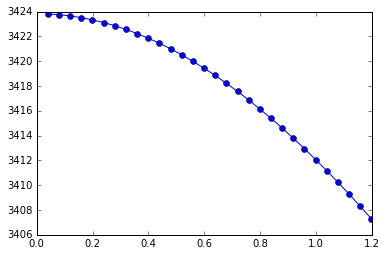

In [9]:
c_h_stretch = lambda e :e.calc.max_data['vibfreqs'][-3]
freqs = [c_h_stretch(f) for f in irc_frames[1:]]
steps = irc_steps[1:]
plot(steps, freqs, marker='o')
show()

In [10]:
view_ipython_jmol(irc_frames[1],vib=3)

In [16]:
irc_calc_2 = copy.deepcopy(init_ts)
irc_calc_2.calc.restart(label='irc_3', irc='(rcfc, forward, recorrect=never, stepsize=2, maxpoints=50, verytight)', opt=None, freq=None)
irc_calc_2.calc.set_job(nodes=16, memory=16*2000, time=2, queue='pqmb', version='g09')
#irc_calc_2.calc.start(frc=True)
#check_calcs([irc_calc_2])
#gen_fchks([irc_calc_2])
#check_calcs([irc_calc_2], depth='heavy', frc=True)

In [17]:
irc_frames_2 = irc_calc_2.calc.fchk_data.irc_frames
irc_steps_2 = irc_calc_2.calc.fchk_data.irc_steps
for (i, proj_freq_calc_2) in enumerate(irc_frames_2):
    proj_freq_calc_2[-1].charge = -1 #set charge of one cl to -1 so that overall charge in -1
    proj_freq_calc_2.set_calculator(Gaussian(label='irc_2_point_{n}'.format(n=i), method='HF', basis='6-31G(d)', symmetry='none', freq='projected'))
    proj_freq_calc_2.calc.set_job(nodes=8, memory=8*1400, time=1, queue='pqmb', version='g09')
    #proj_freq_calc_2.calc.start(frc=True)

In [18]:
check_calcs(irc_frames_2)

'Calculations complete'

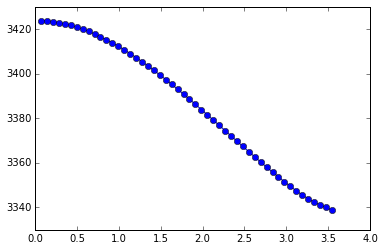

In [20]:
c_h_stretch = lambda e :e.calc.max_data['vibfreqs'][-3]
freqs = [c_h_stretch(f) for f in irc_frames_2[1:]]
steps = irc_steps_2[1:]
plot(steps, freqs, marker='o')
show()

Perhaps we can combine the irc option with the frequency projection directly?

In [21]:
irc_calc = copy.deepcopy(init_ts)
irc_calc.calc.restart(label='irc_4', irc='(rcfc, forward, update=(Predictor=5,Corrector=5), maxpoints=30, stepsize=-4, verytight)', opt='', freq='projected')
irc_calc.calc.set_job(nodes=16, memory=16*2000, time=2, queue='pqmb', version='g09')
#irc_calc.calc.start()
mols_to_html(check_calcs([irc_calc]))
#gen_fchks([irc_calc])
#check_calcs([irc_calc], depth='heavy', frc=True)

irc_4,,Error: Cannot combine IRC and frequency calculations.


Guess not!

Let's check projected frequencies on excited state surfaces:

In [13]:
#from bioservices.chemspider import ChemSpider as C_spider
#from pybel import readstring
#from ase.io import read

##from http://www.chemspider.com/UserProfile.aspx (user: CFare, pass:usual)
#c_spider_token = 'ba638050-d56a-44be-9be4-4403f582bfe7'

#spider = C_spider(token=c_spider_token)
#id = spider.find('ethene')[0]
#ethene_s = spider.mol(id)
#ethene_b=readstring('mol',ethene_s)
#ethene_b.addh()
#ethene_b.write('xyz', 'ethene.xyz',overwrite=True)
##view_avo(eth) #made ts guess 

In [22]:
eth=read('ethene.xyz')
eth.set_calculator(Gaussian(label='HF_6_31Gd_ethene', method='HF', basis='6-31G(d)', symmetry='none', opt='opt'))
eth.calc.set_job(nodes=8, memory=8*1200, time=1, queue='pqmb', version='g09-d01')
relax_eth = read(eth.calc.log)
relax_eth.write('hf_relaxed_ethene.xyz')

In [23]:
check_calcs([eth])
mols_to_html([eth])

HF_6_31Gd_ethene,,Success


This IRC takes us from a FC point (at an experimentally defined groundstate geometry) down to a second order saddle point. It does not have much physical meaning but served simply to test the projected frequency code wasn't doing anything too crazy

In [24]:
eth_irc_down = read('ethene.xyz')
eth_irc_down.set_calculator(Gaussian(label='eth_irc_down', method='CIS', basis='6-31G(d)', symmetry='none', irc='(calcfc, update=(Predictor=5,Corrector=5), maxpoints=30, stepsize=-4, verytight, downhill)'))
eth_irc_down.calc.set_job(nodes=16, memory=16*2000, time=2, queue='pqmb', version='g09-d01')
#eth_irc_down.calc.start()
check_calcs([eth_irc_down],depth='heavy')
mols_to_html([eth_irc_down])

eth_irc_down,,Success


In [25]:
eth_irc_down_frames = eth_irc_down.calc.fchk_data.irc_frames
eth_irc_down_steps = eth_irc_down.calc.fchk_data.irc_steps
for (i, proj_freq) in enumerate(eth_irc_down_frames):
    proj_freq.set_calculator(Gaussian(label='eth_irc_down_point_{n}'.format(n=i), method='CIS', basis='6-31G(d)', symmetry='none', freq='projected'))
    proj_freq.calc.set_job(nodes=8, memory=8*1400, time=1, queue='pqmb', version='g09-d01')
#    proj_freq.calc.start(frc=True)
#check_calcs(eth_irc_down_frames, frc=True)
#mols_to_html(eth_irc_down_frames)

Lets compare projected frequencies to normal frequencies:

In [26]:
eth_irc_down_norm_frames = eth_irc_down.calc.fchk_data.irc_frames
eth_irc_down_norm_steps = eth_irc_down.calc.fchk_data.irc_steps
for (i, freq) in enumerate(eth_irc_down_norm_frames):
    freq.set_calculator(Gaussian(label='eth_irc_down_norm_point_{n}'.format(n=i), method='CIS', basis='6-31G(d)', symmetry='none', freq='freq'))
    freq.calc.set_job(nodes=8, memory=8*1400, time=1, queue='pqmb', version='g09-d01')
#    freq.calc.start(frc=True)
#check_calcs(eth_irc_down_norm_frames, frc=True)
#mols_to_html(eth_irc_down_norm_frames)

Data extraction:

In [29]:
#frame_data contains a list of frame_vibrations i.e. each element contains all the vibrations present at that geom
#mode_data contains a list of mode vibrations, i.e. each element contains all the vibrations corresponding to that mode

from cc_utils.vib_analysis import normalize, Vibrations, get_modes, sort_by_mode_id
gradient_extract = lambda e :np.array(unwind(e.calc.max_data['grads'][0]))

steps = eth_irc_down_steps
frame_grads = [gradient_extract(f) for f in eth_irc_down_norm_frames]

frame_data = [get_modes(frame) for frame in eth_irc_down_norm_frames]
frame_data = sort_by_mode_id(frame_data[:-3]) + frame_data[-3:]
mode_data = map(Vibrations, zip(*frame_data))
    
proj_frame_data = [get_modes(frame) for frame in eth_irc_down_frames]
proj_frame_data = sort_by_mode_id(proj_frame_data[:-3]) + proj_frame_data[-3:]
proj_mode_data = map(Vibrations, zip(*proj_frame_data))
    
#pairwise normalised vector dot products
mode_grad_alignments = [modes.alignments(frame_grads) for modes in mode_data]
proj_mode_grad_alignments = [proj_modes.alignments(frame_grads) for proj_modes in proj_mode_data]

#this is a naieve comparison that assumes the projected normal modes are small perturbations of the normal modes minus mode 7 
comp_mode_data = mode_data[:6] + mode_data[7:]
deltas = [np.array(proj_mode.freqs) - np.array(mode.freqs) for proj_mode,mode in zip(proj_mode_data, comp_mode_data)]

#A better comparison should instead examine the mode character as determined by the overlap with the original modes

Plots:

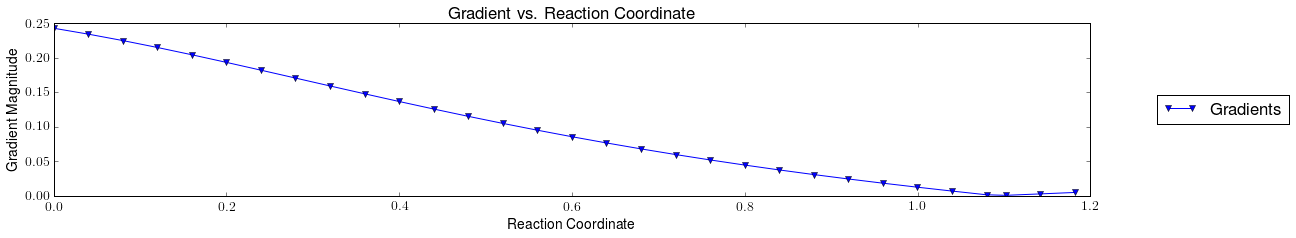

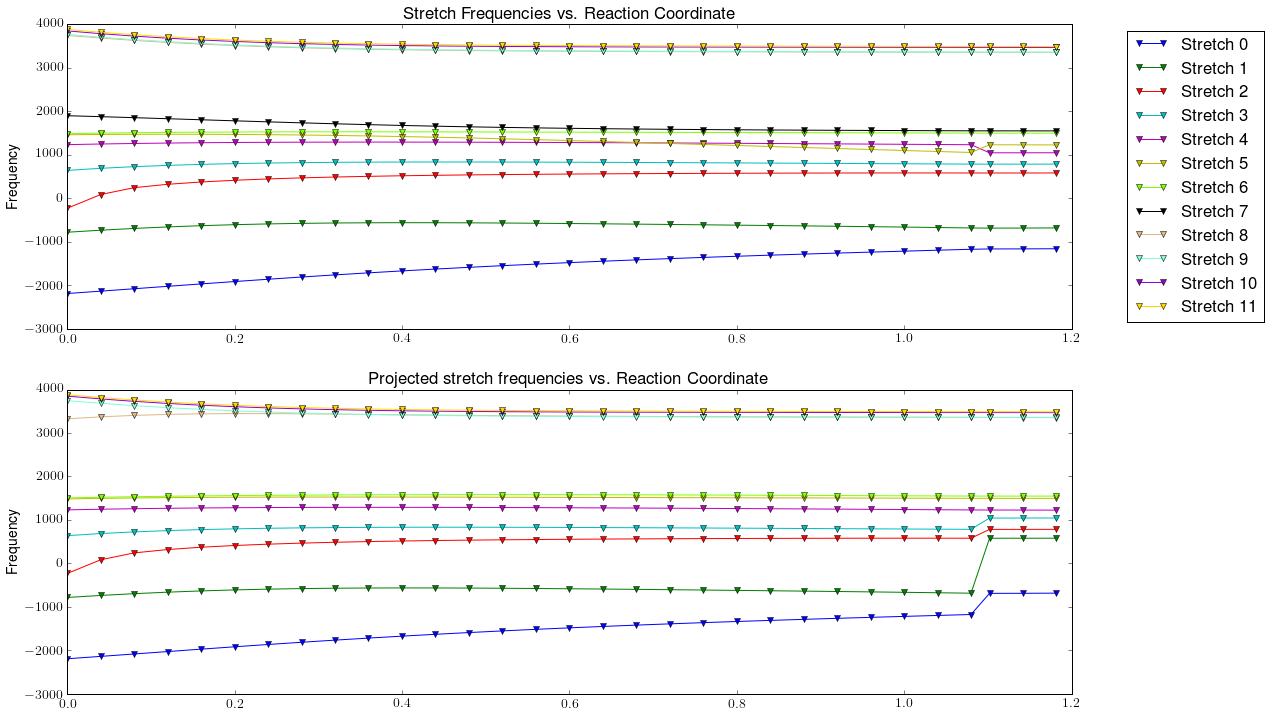

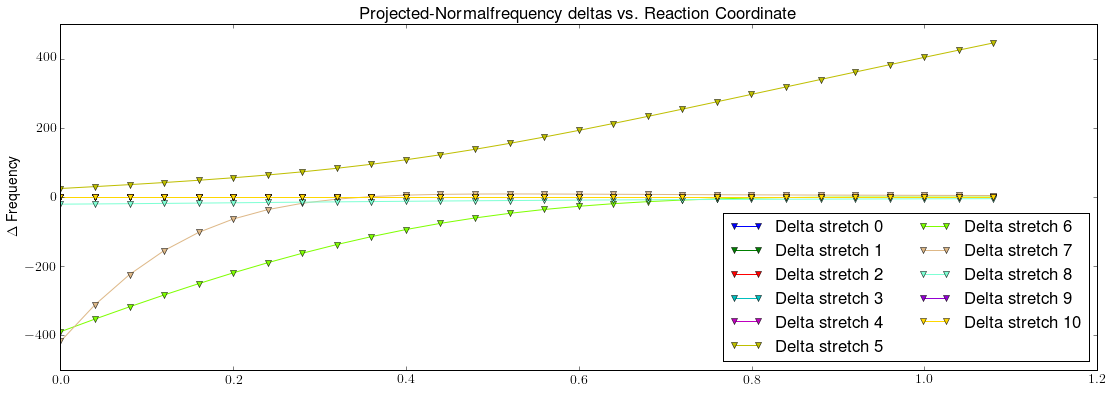

In [30]:
#%pylab --no-import-all qt
#matplotlib settings
rc('text', usetex=True)
rc('font',size=14)

#colours to use in plots (in projection normal mode 7 is missing so we remove that colour from the colourmap
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'chartreuse','k','burlywood','aquamarine','darkviolet', 'gold']
proj_colours = ['b', 'g', 'r', 'c', 'm', 'y','chartreuse','burlywood','aquamarine','darkviolet', 'gold']

#plots
fig1 = figure(figsize=(18,3))
axes1 = fig1.add_axes([0.1,0.1,0.8,0.8])
axes1.plot(steps, map(np.linalg.norm, frame_grads), marker='v', label='Gradients')
axes1.set_xlabel('Reaction Coordinate')
axes1.set_ylabel('Gradient Magnitude')
axes1.set_title('Gradient vs. Reaction Coordinate')
axes1.legend(loc=5, bbox_to_anchor=(1.2, 0.5))

fig, axes = subplots(2, 1, figsize=(18, 12))
for i, mode in enumerate(mode_data):
    axes[0].plot(steps, mode.freqs, marker='v', color=colours[i], label='Stretch {index}'.format(index=i))
axes[0].set_ylabel('Frequency')
axes[0].set_title('Stretch Frequencies vs. Reaction Coordinate')
axes[0].legend(loc=5, bbox_to_anchor=(1.2, 0.5))

for i,proj_mode in enumerate(proj_mode_data):
    axes[1].plot(steps, proj_mode.freqs, marker='v', color=proj_colours[i], label='Stretch {index}'.format(index=i))
axes[1].set_ylabel('Frequency')
axes[1].set_title('Projected stretch frequencies vs. Reaction Coordinate')
#axes[1].legend(loc=4)

fig3 = figure(figsize=(18,6))
axes3 = fig3.add_axes([0.1,0.1,0.8,0.8])
for i, delta in enumerate(deltas):
    axes3.plot(steps[:-3], delta[:-3], marker='v', color= proj_colours[i], label='Delta stretch {ind}'.format(ind=i))
axes3.set_title('Projected-Normalfrequency deltas vs. Reaction Coordinate')
axes3.set_ylabel(r'$\Delta$ Frequency')
axes3.legend(ncol=2,loc=4)

show()

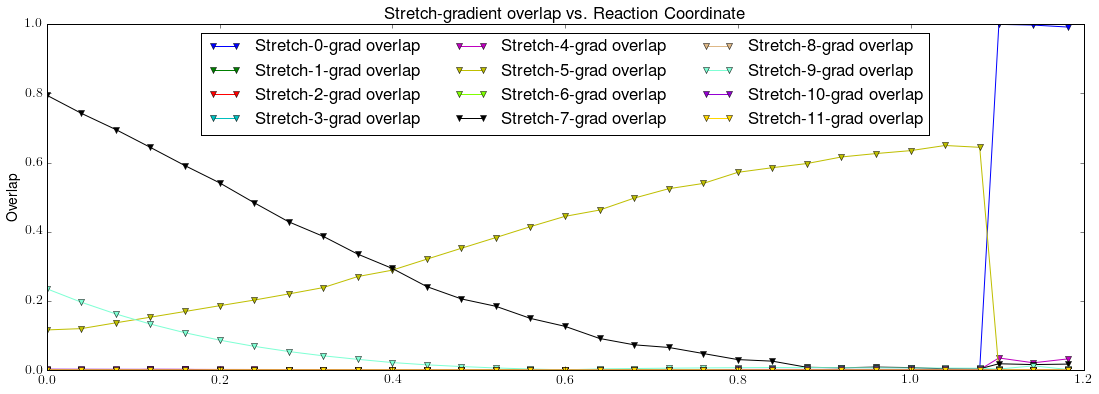

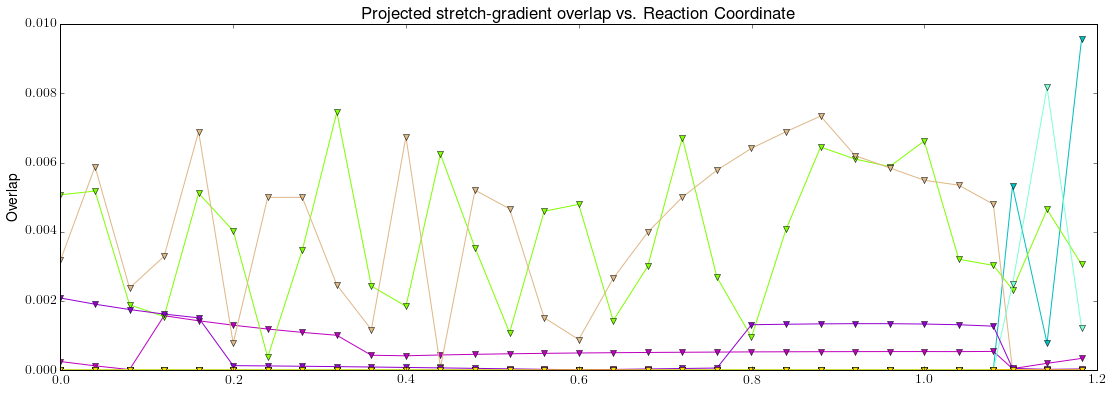

In [33]:
fig4 = figure(figsize=(18,6))
axes4 = fig4.add_axes([0.1,0.1,0.8,0.8])
for i, alignment in enumerate(mode_grad_alignments):
    axes4.plot(steps, alignment, marker='v', color=colours[i], label='Stretch-{ind}-grad overlap'.format(ind=i))
axes4.set_title('Stretch-gradient overlap vs. Reaction Coordinate')
axes4.set_ylabel('Overlap')
axes4.legend(ncol=3,loc=9)

fig5 = figure(figsize=(18,6))
axes5 = fig5.add_axes([0.1,0.1,0.8,0.8])
for i, proj_alignment in enumerate(proj_mode_grad_alignments):
    axes5.plot(steps, proj_alignment, marker='v', color=proj_colours[i], label='Projected Stretch {ind} gradient overlap'.format(ind=i))
axes5.set_title('Projected stretch-gradient overlap vs. Reaction Coordinate')
axes5.set_ylabel('Overlap')
#axes5.legend(ncol=2,loc=4)

show()

The discontinuities present in the last three points of the projected frequency calculations are due to the IRC path passing over the minimum (which is actually a second order saddle point) and then taking a different trajectory for those final few points. This different trajectory results in a completely different gradient and consequently the coordinate projected out is completely different and the subsequent shift in the modes is discontinuous.

The numerical error we can see in the projected frequencies modes showing some overlap with gradient is slightly concerning and means we will have to pay attention to the numerics when using projected freqs.

The plot of the differences in frequency between the projected and the non-projected is not enormously meaningfull because the modematching being used doesn't really make sense. We need to describe the projected modes in terms of the non-projected ones (or vice versa) using the non-projected modes as a basis for the projected ones (maybe we could use coloured stripes to represent the make up of a given projeceted mode in terms of the unprojected modes).

The most important thing is to try and think about why projected frequencies make sense as a reasonable approximation of a time dependent IR spec.

In [34]:
eth_s1_min = read('ethene.xyz')
eth_s1_min.set_calculator(Gaussian(label='ethene_s1_min', method='CIS', basis='6-31G(d)', symmetry='none', opt='opt'))
eth_s1_min.calc.set_job(nodes=8, memory=8*1400, time=1, queue='pqmb', version='g09-d01')
eth_s1_min.calc.restart(add_label='freq', opt='', freq='freq')

<gausspy.gaussian.Gaussian instance at 0x7f7d8ea01638>

In [35]:
check_calcs([eth_s1_min])
mols_to_html([eth_s1_min])

ethene_s1_min_freq_restart_1,,Success


In [36]:
eth_ts=read('ethene_ts_guess.xyz')
eth_ts.set_calculator(Gaussian(label='ethene_ts', method='CIS', basis='6-31G(d)', symmetry='none', opt='(ts calcfc noeigen verytight)'))
eth_ts.calc.set_job(nodes=8, memory=8*1400, time=1, queue='pqmb', version='g09-d01')
eth_ts.calc.restart(add_label='freq', opt='', freq='freq')

<gausspy.gaussian.Gaussian instance at 0x7f7d8e45fb90>

In [37]:
check_calcs([eth_ts])
mols_to_html([eth_ts])

ethene_ts_freq_restart_1,,Success


In [38]:
eth_irc=copy.deepcopy(eth_ts)
eth_irc.calc.restart(label='eth_irc', irc='(rcfc, update=(Predictor=5,Corrector=5), maxpoints=30, stepsize=-4, verytight)', opt='', freq=None)
eth_irc.calc.set_job(nodes=16, memory=16*2000, time=2, queue='pqmb', version='g09-d01')

In [39]:
check_calcs([eth_irc])
mols_to_html([eth_irc])

eth_irc,,Success


In [40]:
eth_irc_frames = eth_irc.calc.fchk_data.irc_frames
eth_irc_steps = eth_irc.calc.fchk_data.irc_steps
for (i, proj_freq) in enumerate(eth_irc_frames):
    proj_freq.set_calculator(Gaussian(label='eth_irc_point_{n}'.format(n=i), method='CIS', basis='6-31G(d)', symmetry='none', freq='projected'))
    proj_freq.calc.set_job(nodes=8, memory=8*1400, time=1, queue='pqmb', version='g09-d01')    
    #proj_freq.calc.start(frc=True)
check_calcs(eth_irc_frames)

'Calculations complete'

In [41]:
#the fchk point contains all the reverse steps from initial to TS followed by from final to TS so we need to reverse the final half, or simply order the pairs by the step coordinate
temp_steps, temp_frames = zip(*sorted(zip(eth_irc_steps, eth_irc_frames), key=lambda e:e[0]))

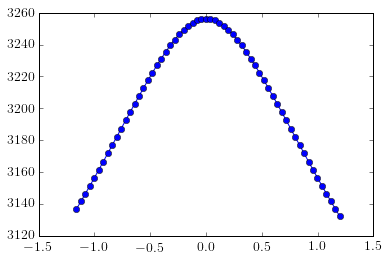

In [42]:
c_h_stretch = lambda e :e.calc.max_data['vibfreqs'][-3]
freqs = [c_h_stretch(f) for f in temp_frames[1:]]
steps = temp_steps[1:]
plot(steps, freqs, marker='o')
show()

### Notes

Hrant's [paper](http://scitation.aip.org/content/aip/journal/jcp/107/22/10.1063/1.475238) makes clear that the method used to project out the path is to project out the gradient vector (i.e. the steepest decent vector). So in general projected frequencies will still be valid with downhill only paths, however if we have more than two imaginary frequencies then we would expect imaginary frequencies in our projected frequency calculations. (Which in turn renders the frequencies meaningless)

Coordinates and energies of points along the IRC are extracted from the irc fchk point file so this needs to be generated.

High accuracy geometries important for projected frequencies. 

For small irc step sizes need tight convergence criteria to avoid premature convergence. In this case an irc stepsize of 0.004 amu Ang (stepsize=-4) requires verytight convergence. To use stepsize=-2 we need to tighten convergence further to avoid the irc terminating on the first step. We can do this via an [IOP](http://www.gaussian.com/g_tech/g_iops/ov1.htm): iop(1/7=1)

We can use the projected ferquency to construct a simplified PES that is accurate close the MEP alternatively we can use them to compute an approximate time dependent IR spec. In this sense as far as I can see computing the projected frequencies and treating them as if they are normal frequencies is equivalent to supposing motion along the reaction path is very slow relative to the speed of vibrations. I'm not quite sure what the difference as to doing a normal frequency calculation and ignoring the imaginary frequency, Lee says that the non-zero first derivative of the path coordinate means we will see coupling of the normal modes but this doesn't really mean anything to me! 

The actual projected frequency algorithm is projecting out the maximum gradient and then computing the normal modes in the remaining coordinates. This guarantees that the system is at a minimum w.r.t. the new set of coordinates. (Proof by contradiction: assume a coordinate vector orthogonal **a** to the maximum gradient vector **g**, has finite gradient, it then becomes possible to construct a new vector **b** out of a linear combination of **a** and **g** that has a larger gradient than **g** which by definition is impossible therefore **a** must have zero gradient.)

### Projected Frequencies with ONIOM

In [46]:
azo_44_ts_xyz = 'B3LYP_631Gd_B3LYP_631Gd_4_4_cent_azomethine_ts_v2_final.xyz'
ylide_atoms = [67,68,69,70,71,72,73,74]
graph_atoms = [28,29] #2 C atoms

proj_o = read(azo_44_ts_xyz)

In [ ]:
proj_o = read(azo_44_ts_xyz)
proj_o.set_calculator(Gaussian(label=test_calc_versions[i], method='oniom(uB3LYP/6-31G(d):upm6)', basis='oniom', opt='calcfc, ts, noeigen'))
proj_o_H = ylide_atoms + graph_atoms
proj_o.calc.oniom_coord_params['layers'] = [[no -1 for no in proj_o_H]]
proj_o.calc.oniom_coord_params['layer_mults'] = [1,1]
proj_o.calc.set_job(nodes=8, memory=8*1600, time=8, version='g09-d01')